In [12]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/utbl_allseg_campavgbl_bltau_twp.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/mustar_allseg_campavgbl_bltau_twp.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/tau_allseg_campavgbl_bltau_twp.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/t_allseg_campavgbl_bltau_twp.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/gf_allseg_campavgbl_bltau_twp.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/segment_info_campavgbl_bltau_twp.pkl')
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/trcnames_allseg_twp_bltau.pkl")

In [13]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_info['r squared'] >= 0.65))

seg_info_screened = seg_info.iloc[high_r2_idx]

# screen vars 
mustar_allseg_screened = mustar_allseg[high_r2_idx]
utbl_allseg_screened = utbl_allseg[high_r2_idx]
tau_allseg_screened = tau_allseg[high_r2_idx]
trcnames_allseg_screened = trcnames_allseg[high_r2_idx]

gf_allseg_screened = gf_allseg[high_r2_idx]
t_allseg_screened = t_allseg[high_r2_idx]

//anaconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [14]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF07 

Text(4, 1, 'RF07')

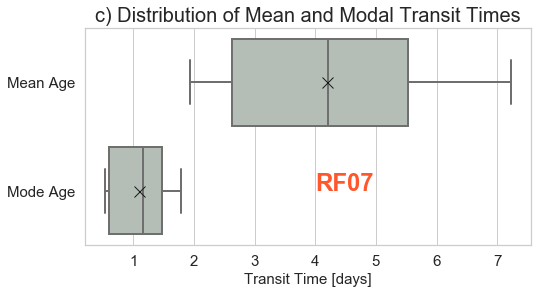

In [15]:
############## RF07 ALONE ##############
rf07_info = seg_info_screened[seg_info_screened['Flight'] == 'RF07']
rf07_idx = rf07_info.index.values
rf07_idx


############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf07 = pd.DataFrame()
rf07['Mean Age'] = rf07_info['mean age'].values
rf07['Mode Age'] = rf07_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf07, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.text(4, 1, 'RF07', fontsize = 24, weight = 'bold', color = color[8])


/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

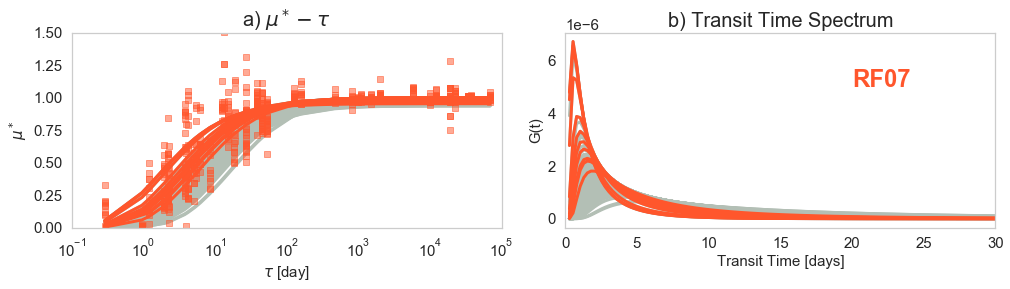

In [16]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf07_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf07_info['r squared'].loc[i]
    mean_age = rf07_info['mean age'].loc[i]
    mode_age = rf07_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[8]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, 'RF07', fontsize = 24, weight = 'bold', color = my_color)
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [17]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF05 

Text(8, 1, 'RF05')

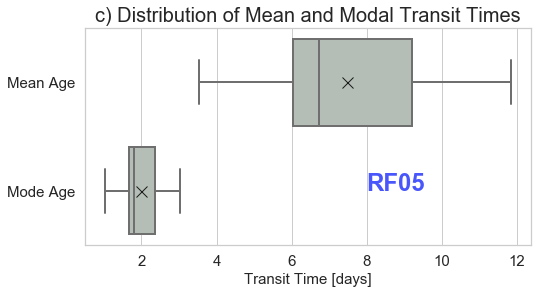

In [18]:
############## RF05 ALONE ##############
rf05_info = seg_info_screened[seg_info_screened['Flight'] == 'RF05']
rf05_idx = rf05_info.index.values
rf05_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf05 = pd.DataFrame()
rf05['Mean Age'] = rf05_info['mean age'].values
rf05['Mode Age'] = rf05_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf05, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.text(8, 1, 'RF05', fontsize = 24, weight = 'bold', color = color[1])


/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

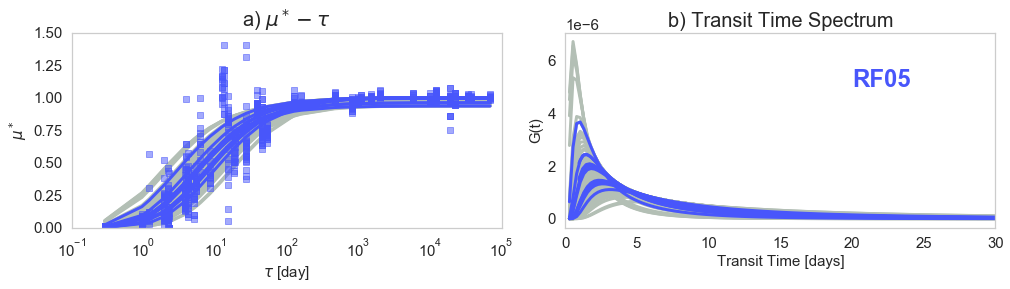

In [19]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf05_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf05_info['r squared'].loc[i]
    mean_age = rf05_info['mean age'].loc[i]
    mode_age = rf05_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, 'RF05', fontsize = 24, weight = 'bold', color = my_color)
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])
